## Data set description:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.




The datasets consists of several medical predictor variables and one target variable, [Outcome, where Non diabetic = 0, Diabetic = 1].




Predictor variables includes: (1)-Number of times pregnant, (2)-Plasma glucose concentration a 2 hours in an oral glucose tolerance test, (3)-Diastolic blood pressure (mm Hg), (4)-Triceps skin fold thickness (mm), (5)-2-Hour serum insulin (mu U/ml), (6)-Body mass index (weight in kg/(height in m)^2), (7)-Diabetes pedigree function, (8)-Age.

## Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Importing Standardization
from sklearn.model_selection import train_test_split
from sklearn import svm # Importing Support Vector Machine model
from sklearn.metrics import accuracy_score

## Loading the data:

In [2]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Preprocessing and cleaning:

In [3]:
# Check for numbers of rows and columns we have:
df.shape

(768, 9)

In [4]:
# Getting information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Getting Statistical summary:
df.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [6]:
# Check for missing data:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Ceheck for duplicated Values:
df.duplicated().sum()

0

### Exploraty Data Analysis

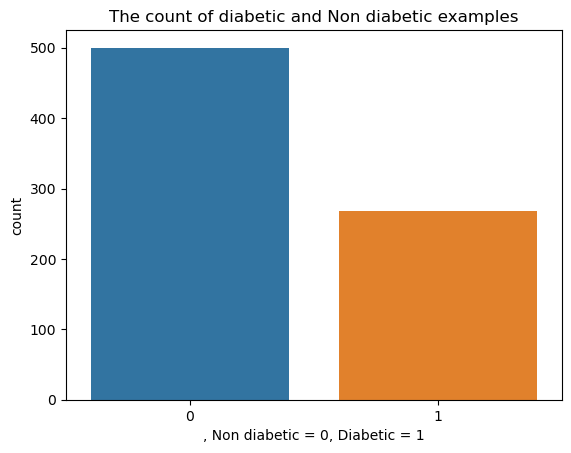

In [8]:
sns.countplot(x="Outcome", data=df);

plt.title("The count of diabetic and Non diabetic examples")
plt.xlabel(", Non diabetic = 0, Diabetic = 1");

##### Getting the mean values for each feature for diabetic and Non diabetic examples 

In [9]:
df.groupby("Outcome").mean().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.0,110.0,68.0,20.0,69.0,30.0,0.0,31.0
1,5.0,141.0,71.0,22.0,100.0,35.0,1.0,37.0


## Data Preprocessing For Machine Learning:

Predictor variables includes: (1)-Number of times pregnant, (2)-Plasma glucose concentration a 2 hours in an oral glucose tolerance test, (3)-Diastolic blood pressure (mm Hg), (4)-Triceps skin fold thickness (mm), (5)-2-Hour serum insulin (mu U/ml), (6)-Body mass index (weight in kg/(height in m)^2), (7)-Diabetes pedigree function, (8)-Age.

In [10]:
df.head(550)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
545,8,186,90,35,225,34.5,0.423,37,1
546,5,187,76,27,207,43.6,1.034,53,1
547,4,131,68,21,166,33.1,0.160,28,0
548,1,164,82,43,67,32.8,0.341,50,0


##### Creating X & Y Variables

In [11]:
x = df.drop(columns = "Outcome")
y = df["Outcome"]

print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


##### Data Standrization:

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

print(x_scaled)

##### Splitting the data to test and train data:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, stratify=y, random_state=2)

## Training & evaluting the model:

##### Loading the model:

In [13]:
classifier  = svm.SVC(kernel="linear")

##### Training the model:

In [14]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

### Evaluting the model:

##### Making prediction on training data and then evaluting the model:

In [15]:
x_train_prediction = classifier.predict(x_train)
predicted_x_train_accuracy = accuracy_score(x_train_prediction, y_train)

print("The accuracy score for training data prediction is: ",predicted_x_train_accuracy)

The accuracy score for training data prediction is:  0.7814761215629522


##### Making prediction on test data and then evaluting the model:

In [16]:
x_test_prediction = classifier.predict(x_test)
predicted_x_test_accuracy = accuracy_score(x_test_prediction, y_test)

print("The accuracy score for test data prediction is: ",predicted_x_test_accuracy)

The accuracy score for test data prediction is:  0.7792207792207793


## NOTE:
This model will be deployed and available for end user very soon!!.

In [17]:
import pickle

In [18]:
filename = "Diabetes Prediction.sav"

pickle.dump(classifier,open(filename,"wb"))